# Ruckig and ScurveGenertor 

In [8]:
from pyScurveGenerator import *
from math import *
from copy import copy
from pathlib import Path
from sys import path
from draw_functions import *
import time
from ruckig import InputParameter, OutputParameter, Result, Ruckig, Synchronization, ControlInterface, DurationDiscretization
def walk_through_trajectory(otg, inp):
    out_list = []
    out = OutputParameter(inp.degrees_of_freedom)

    res = Result.Working
    while res == Result.Working:
        res = otg.update(inp, out)

        out.pass_to_input(inp)
        out_list.append(copy(out))

    return out_list

# initial Value

In [9]:
dof = 1
dt = 0.00001
so = 0.0
sf = 1.0
vo = 0.0
vf = 32.11866322127771
ao = 0.0
af = 2750
vmax = 615.8028722
amax = 5864.8019024
dmax = 5864.8019024
j = 300000

# Scurve Generator

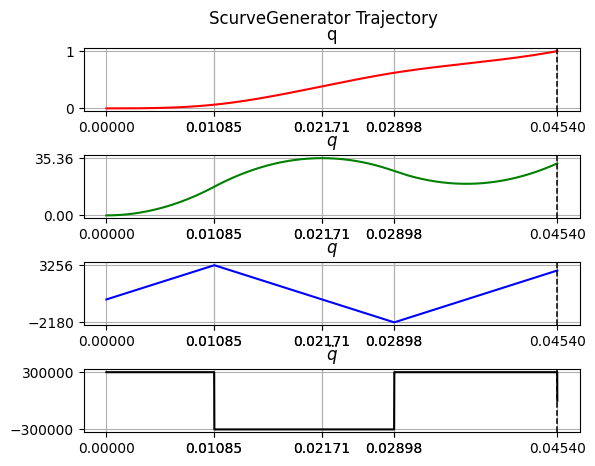

In [10]:
traj = Trajectory()
traj.so = so;
traj.sf = sf;
traj.vo = vo;
traj.vf = vf;
traj.ao = ao;
traj.af = af;
traj.vmax = vmax;
traj.amax = amax;
traj.dmax = dmax;
traj.j = j;
sg = ScurveGenerator([traj])
#sg.printAllTrajectory()
#sg.syncTargetTime(6)
drawScurveGenerator(sg,dt)

# Ruckig Trajectory

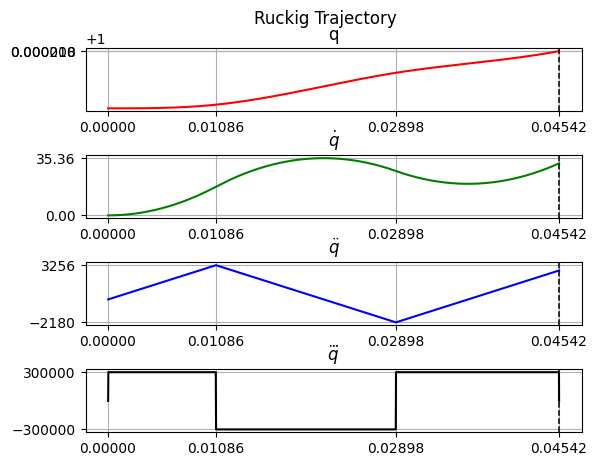


out.new_position = [1.00021807804035]
out.new_velocity = [32.13732963928058]
out.new_acceleration = [2750]
out.time = [0.04542000000000324]
out.calculation_duration = [0.207]



In [11]:
ruckig = Ruckig(dof, dt)
inp = InputParameter(ruckig.degrees_of_freedom)
inp.current_position = [so]
inp.current_velocity = [vo]
inp.current_acceleration = [ao]
inp.target_position = [sf]
inp.target_velocity = [vf]
inp.target_acceleration = [af]
inp.max_velocity = [vmax]
inp.max_acceleration = [amax]
inp.max_jerk = [j]
otg = Ruckig(inp.degrees_of_freedom, dt)
out_list = walk_through_trajectory(otg, inp)
drawRuckig(inp,otg,out_list)
print(out_list[-1])

# Ruckig & ScurveGenerator

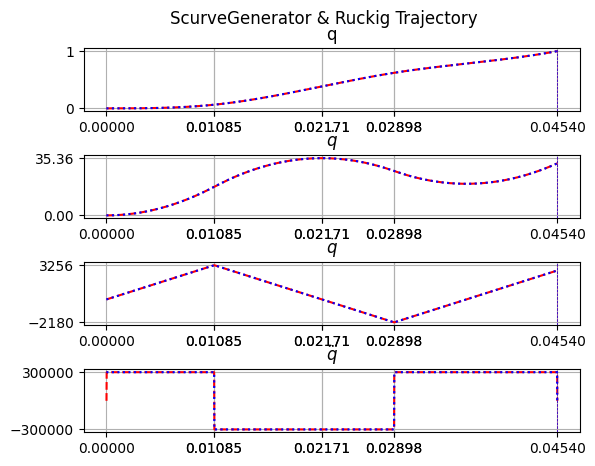

In [12]:
drawRuckigWithScurveGenerator(inp,otg,out_list,sg,dt)

# Ruckig final value error

In [13]:
sf_error = np.array(out_list[-1].new_position) - sf
vf_error = np.array(out_list[-1].new_velocity) - vf
af_error = np.array(out_list[-1].new_acceleration) - af

print("sf_error",sf_error)
print(vf_error)
print(af_error)

sf_error [0.00021808]
[0.01866642]
[-4.54747351e-13]


# ScurveGenerator final value error

In [14]:
sf_error = traj.sf - sf
vf_error = traj.vf - vf
af_error = traj.af - af
print("sf_error",sf_error)
print("vf_error",vf_error)
print("af_error",af_error)

sf_error 0.0
vf_error 0.0
af_error 0.0
